In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [4]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [6]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_columns])
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_columns
)
numerical_df = df.drop(columns=categorical_columns, axis=1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [7]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(encoded_df)
X, y = scaled_df[:, 1:], scaled_df[:, 0]

In [10]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [11]:
regressor = RandomForestRegressor(
    random_state=random_state
)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [13]:
from sklearn.ensemble import AdaBoostRegressor

ada_regressor = AdaBoostRegressor(random_state=random_state)
ada_regressor.fit(X_train, y_train)


AdaBoostRegressor(random_state=1)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(random_state=random_state)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=1)

In [15]:
# random forest regressor
mae = mean_absolute_error(y_val, regressor.predict(X_val))
mse = mean_squared_error(y_val, regressor.predict(X_val))
print(f'Random Forest Regressor MAE: {mae}')
print(f'Random Forest Regressor MSE: {mse}')

# adaboost regressor
mae = mean_absolute_error(y_val, ada_regressor.predict(X_val))
mse = mean_squared_error(y_val, ada_regressor.predict(X_val))
print(f'AdaBoost Regressor MAE: {mae}')
print(f'AdaBoost Regressor MSE: {mse}')

# gradient boosting regressor
mae = mean_absolute_error(y_val, gb_regressor.predict(X_val))
mse = mean_squared_error(y_val, gb_regressor.predict(X_val))
print(f'Gradient Boosting Regressor MAE: {mae}')
print(f'Gradient Boosting Regressor MSE: {mse}')

Random Forest Regressor MAE: 0.46093873321571177
Random Forest Regressor MSE: 0.37944418523089524
AdaBoost Regressor MAE: 0.567680019897059
AdaBoost Regressor MSE: 0.5739244030038942
Gradient Boosting Regressor MAE: 0.4516626127750995
Gradient Boosting Regressor MSE: 0.39610445936979427


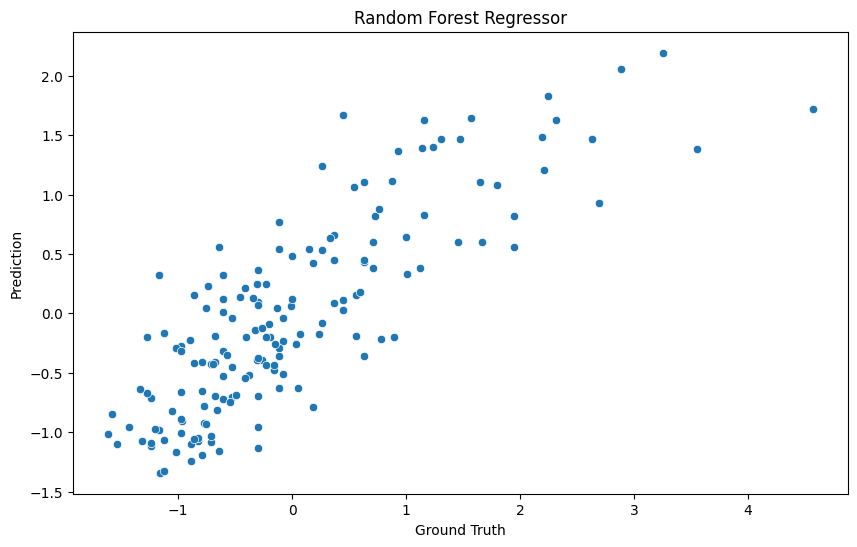

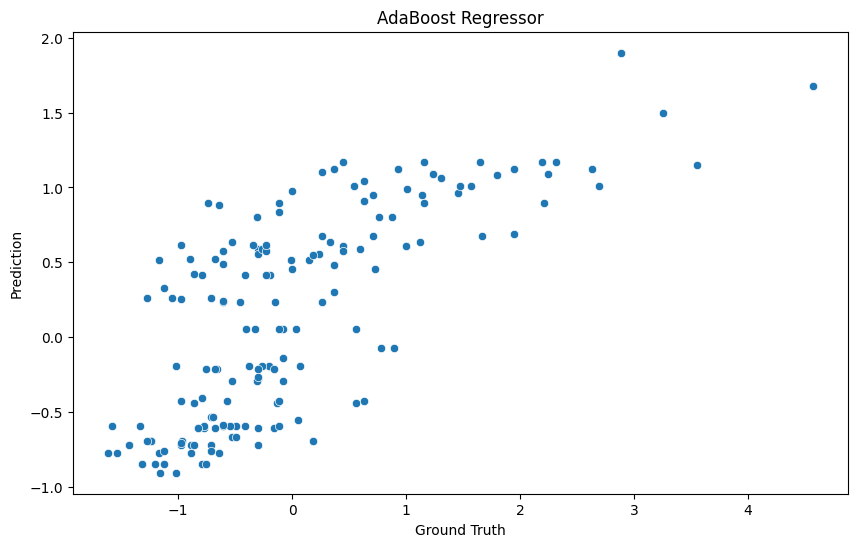

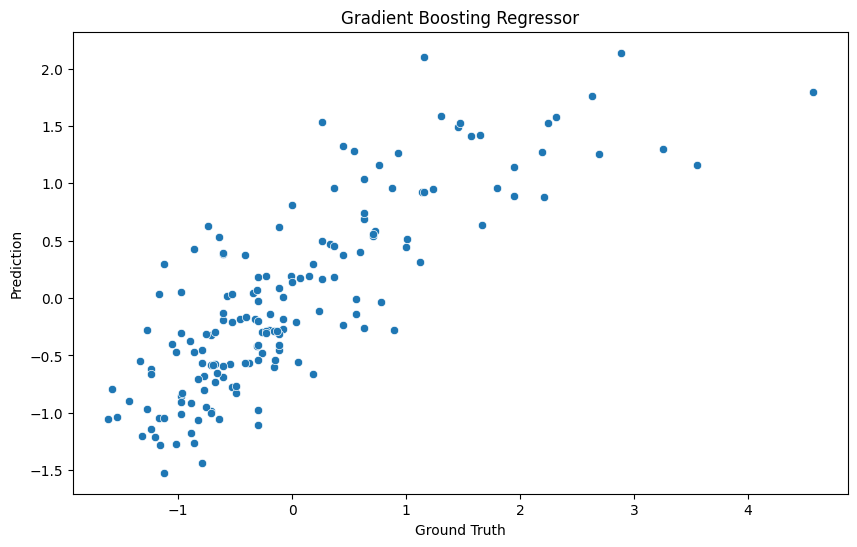

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=regressor.predict(X_val))
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regressor")
plt.show()

# AdaBoost Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=ada_regressor.predict(X_val))
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.title("AdaBoost Regressor")
plt.show()

# Gradient Boosting Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=gb_regressor.predict(X_val))
plt.xlabel("Ground Truth")
plt.ylabel("Prediction")
plt.title("Gradient Boosting Regressor")
plt.show()


In [20]:
X = [3, 5, 8, 10, 12]
y = [12, 20, 28, 32, 36]

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [22]:
tree_regressor = DecisionTreeRegressor(
    random_state=random_state
)
# Reshape X_train to a 2D array with a single column
tree_regressor.fit(np.array(X_train).reshape(-1, 1), y_train)

DecisionTreeRegressor(random_state=1)

In [23]:
# prompt: with X = 2, what is the prediction of the tree regressor

import numpy as np
prediction = tree_regressor.predict(np.array([[2]]))
print(f"Prediction for X = 2: {prediction}")


Prediction for X = 2: [12.]
